# Final Project

### Importing Libraries & Dataset

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("hsv", 10)  # Generates 10 distinct colors


In [5]:
df = pd.read_csv('/dataset[1].csv')
df.shape

(114000, 21)

In [6]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [8]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [9]:
df.isnull().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [10]:
df['track_id'].nunique()

89741

In [11]:
duplicated = df[df['track_id'].duplicated(keep = False)]
print(duplicated.shape)
duplicated.groupby('track_id')['track_id'].count()

(40900, 20)


,track_id
track_id,
001APMDOl3qtx1526T11n1,2
001YQlnDSduXd5LgBd66gT,2
003vvx7Niy0yvhvHt4a68B,3
004h8smbIoAkUNDJvVKwkG,2
006rHBBNLJMpQs8fRC2GDe,3
...,...
7ztSVy67w9rXpKg5L2zN5l,2
7zubR9uYAWjb5KPZTMm85e,4
7zumacGldlmxpoP8bpaeLe,2


The dataframe has 114000 rows and we have only 89741 unique track_ids, which means there are close to 24259 duplicate values in the dataset. Upon investigating further we found there were 16642 different songs occuring multiple times. We need to remove them and clean the data for further analysis.

In [12]:
df = df[df['track_id'].duplicated(keep = 'first') == False]
df.shape

(89741, 20)

### Artists

In [13]:
df['artists'].nunique()


31437

<ipython-input-14-eb1b21a2503a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['artists'].value_counts()[0:5].index, y = df['artists'].value_counts()[0:5].values,palette=palette )
<ipython-input-14-eb1b21a2503a>:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x = df['artists'].value_counts()[0:5].index, y = df['artists'].value_counts()[0:5].values,palette=palette )


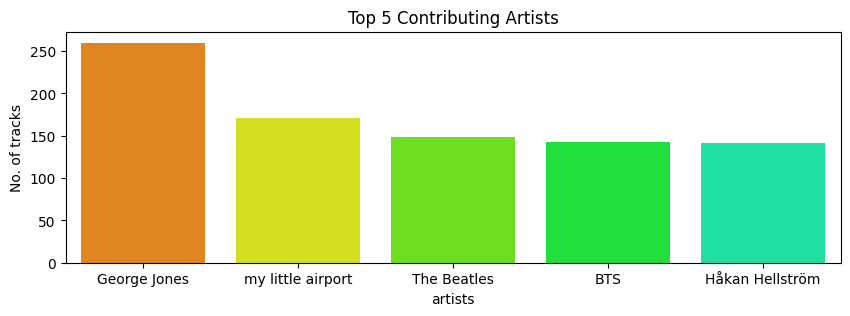

In [14]:
plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = df['artists'].value_counts()[0:5].index, y = df['artists'].value_counts()[0:5].values,palette=palette )
plt.title('Top 5 Contributing Artists')
plt.ylabel('No. of tracks')
plt.show()

### Album Name

In [15]:
df['album_name'].value_counts()

,count
album_name,
The Complete Hank Williams,110
Greatest Hits,77
Mozart: A Night of Classics,75
Alternative Christmas 2022,73
Mozart - All Day Classics,68
...,...
Funk Ostentação,1
Zika Sai Pra Lá,1
Se Eu Te Botar Faz Barulho?,1


### Popularity

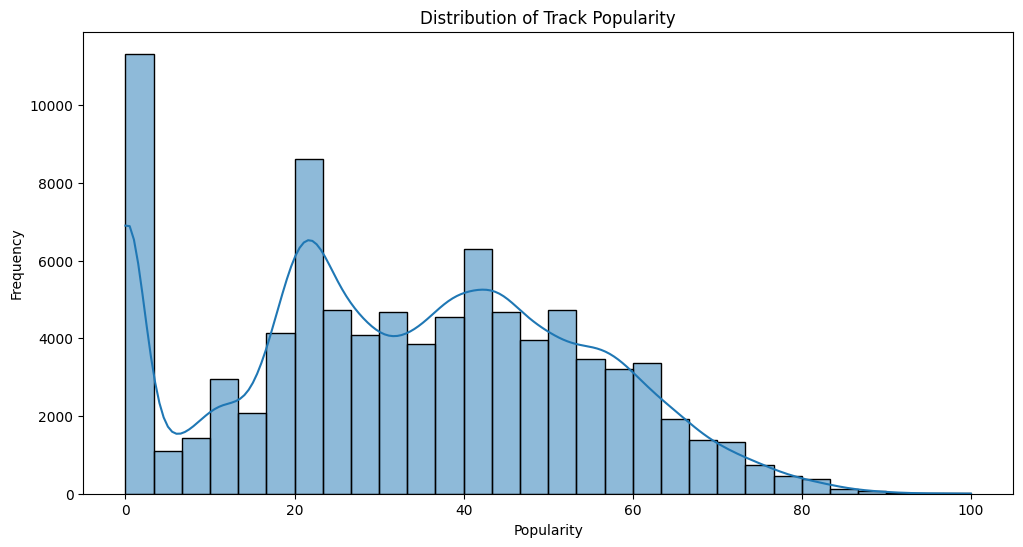

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

The maximum portion of Spotify's library is filled with the songs whose popularity ranges from 0 to 45.

### Bi-VARIATE ANALYSIS


 **1. Artists V/S Popularity**

<ipython-input-17-a5931a3ffccc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values,palette=palette)


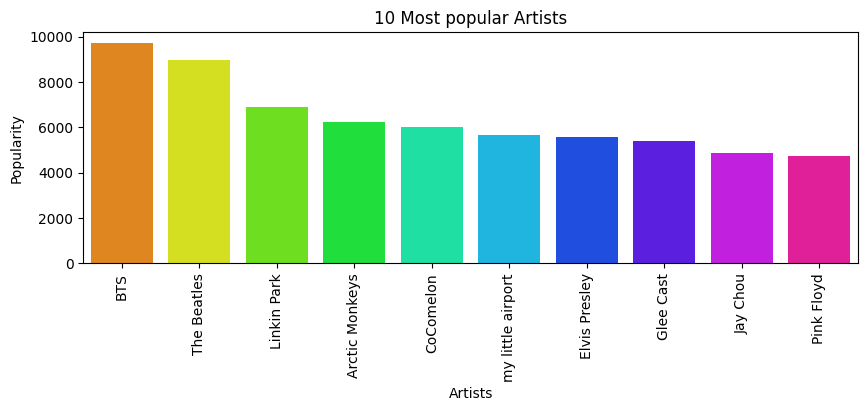

In [17]:
grouped = df.groupby('artists')['popularity'].sum()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values,palette=palette)
plt.xlabel('Artists')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('10 Most popular Artists')
plt.show()

 **2. Artists V/S Popularity**

<ipython-input-18-f195f9028118>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values,palette=palette )
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


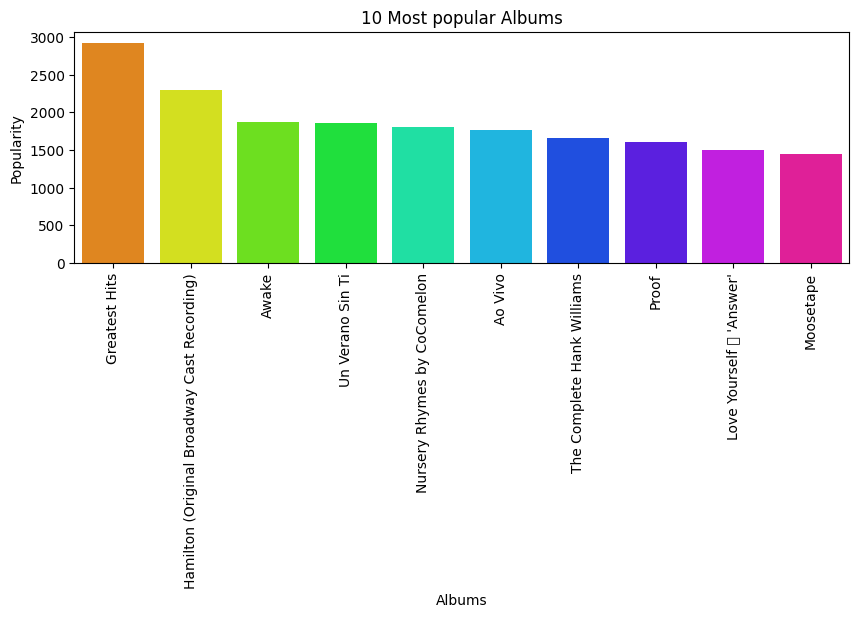

In [18]:
grouped = df.groupby('album_name')['popularity'].sum()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values,palette=palette )
plt.xlabel('Albums')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('10 Most popular Albums')
plt.show()

 **3. Track Name V/S Popularity**

<ipython-input-19-b213c0672746>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values,palette=palette)


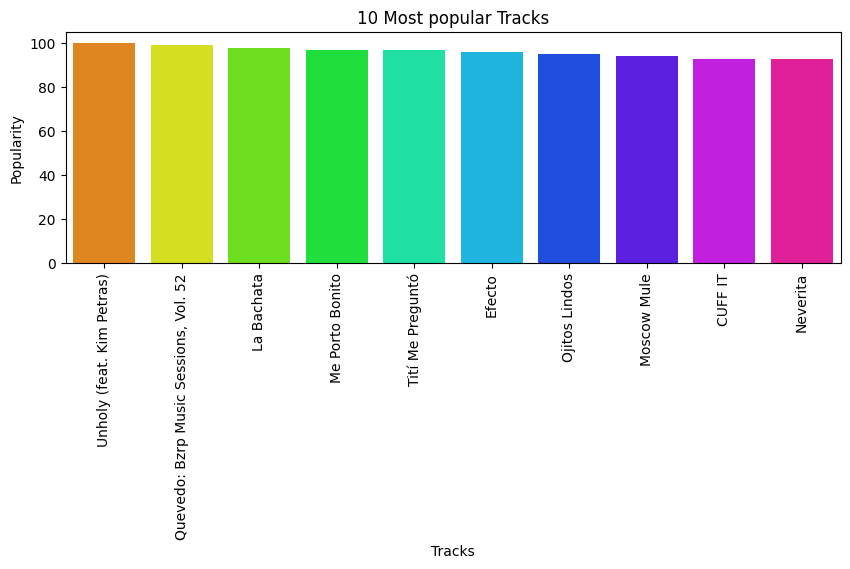

In [19]:
grouped = df.groupby('track_name')['popularity'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.barplot(x = grouped.sort_values(ascending = False)[0:10].index, y = grouped.sort_values(ascending = False)[0:10].values,palette=palette)
plt.xlabel('Tracks')
plt.ylabel('Popularity')
plt.xticks(rotation = 90)
plt.title('10 Most popular Tracks')
plt.show()

In [20]:
df.sort_values(by = 'popularity', ascending = False)[['track_name', 'artists', 'popularity']].head(10)


,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
67356,La Bachata,Manuel Turizo,98
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98
67358,Me Porto Bonito,Bad Bunny;Chencho Corleone,97
67359,Tití Me Preguntó,Bad Bunny,97
67559,Efecto,Bad Bunny,96
79000,I Ain't Worried,OneRepublic,96
20000,Under The Influence,Chris Brown,96
67500,Ojitos Lindos,Bad Bunny;Bomba Estéreo,95


## PAIR COMPARISON ##


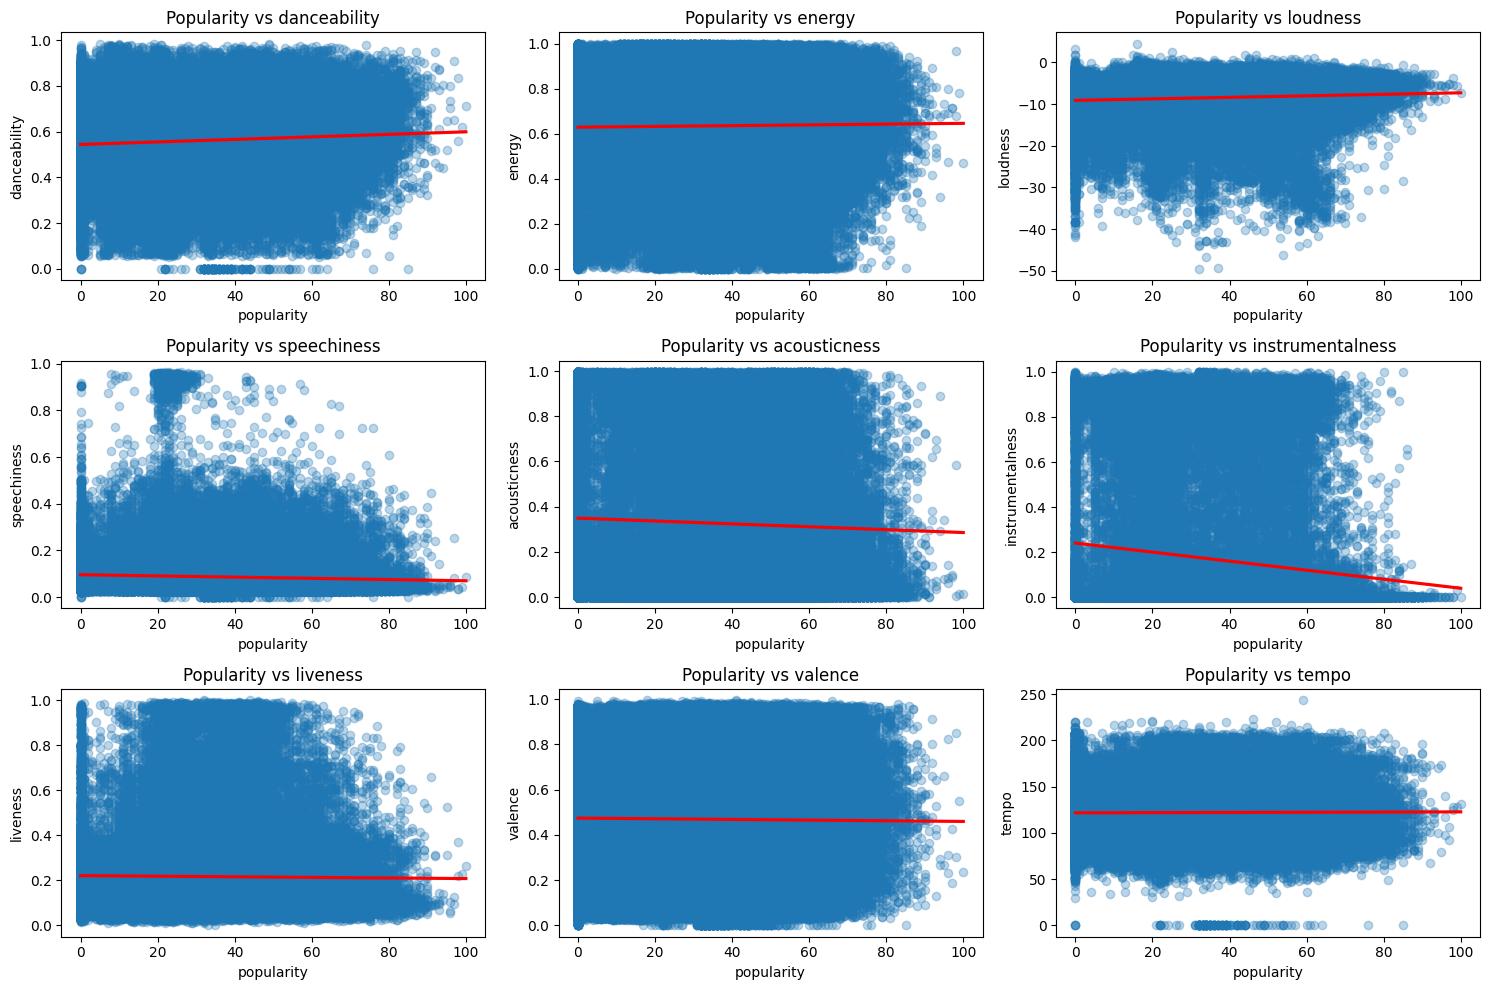

In [21]:
# List of numerical features to compare with popularity
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo']

# Create scatter plots with reduced point opacity and trend lines
plt.figure(figsize=(15, 10))  # Set the figure size
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Creates a subplot for each feature
    sns.regplot(data=df, x='popularity', y=feature, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
    plt.title(f'Popularity vs {feature}')
    plt.tight_layout()  # Adjusts subplot params for a clear layout

plt.show()

## Correlation Matrix ##

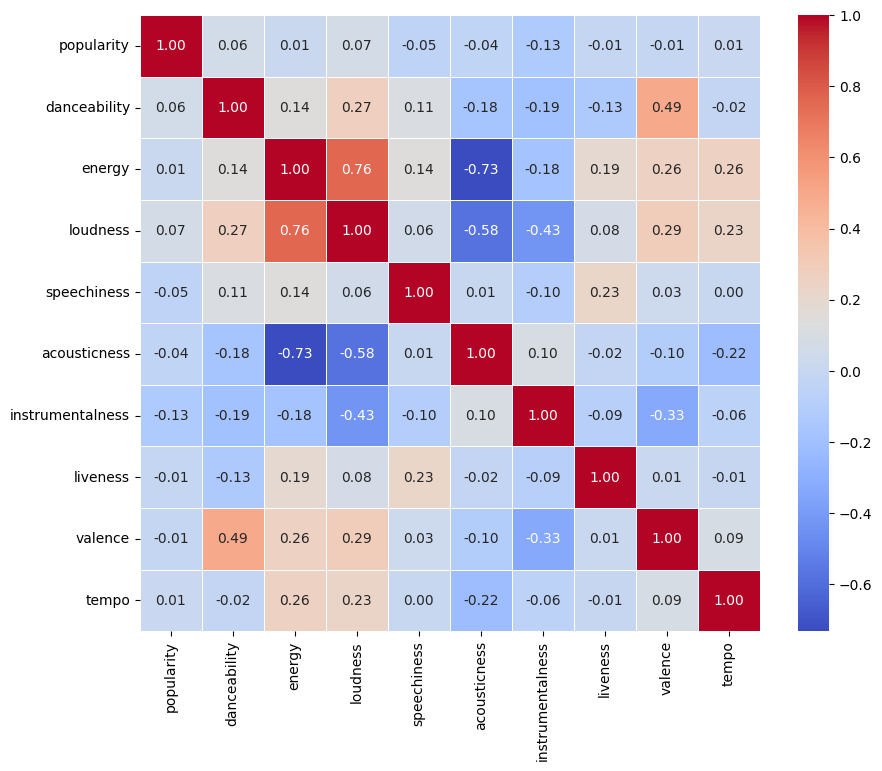

Displaying all correlations to popularity: 
danceability        0.064281
energy              0.013728
loudness            0.071676
speechiness        -0.047081
acousticness       -0.038847
instrumentalness   -0.127465
liveness           -0.013844
valence            -0.011526
tempo               0.007270
Name: popularity, dtype: float64

Highest correlation: 
loudness with a value of 0.07


In [28]:
# List of numerical features to consider
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Compute the correlation matrix for the selected features
correlation_matrix = df[features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            fmt='.2f')
# Display the plot
plt.show()

# Extracting correlations to popularity excluding itself
corr_rows = correlation_matrix.loc['popularity'].drop('popularity')

print("Displaying all correlations to popularity: ")
print(corr_rows)

# Finding and displaying the highest correlation
max_corr_value = corr_rows.max()
max_corr_feature = corr_rows.idxmax()

print("\nHighest correlation: ")
print(f"{max_corr_feature} with a value of {max_corr_value:.2f}")

In [39]:
data=df.drop_duplicates()

In [47]:
feature_numerical=[feature for feature in data.columns if data[feature].dtype!='O']
print('Number of numerical columns=', len(feature_numerical))
data[feature_numerical].head()

Number of numerical columns= 15


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [49]:
X=data[feature_numerical].drop(['popularity'], axis=1)
y=data[feature_numerical]['popularity']

In [50]:
X.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [52]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(62818, 14) (26923, 14)
(62818,) (26923,)


In [53]:
def correlation(dataset,threshold):
    correlated_columns=set()
    correlation_matrix=dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>threshold:
                colname=correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns

In [54]:
corr_features=correlation(X_train,0.7)
print(len(set(corr_features)))
print(corr_features)

2
{'loudness', 'acousticness'}


In [55]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()

In [56]:
X_train_corr.drop(corr_features, axis=1, inplace=True)
X_test_corr.drop(corr_features, axis=1, inplace=True)
print(X_train_corr.shape, X_test_corr.shape)

(62818, 12) (26923, 12)


In [57]:
X_train_corr.isna().sum()

,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0
mode,0
speechiness,0
instrumentalness,0
liveness,0
valence,0


In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
dtree=DecisionTreeRegressor()
rforest=RandomForestRegressor()

In [60]:
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual=y_test-prediction

    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)

    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

In [61]:
import warnings
warnings.filterwarnings("ignore")

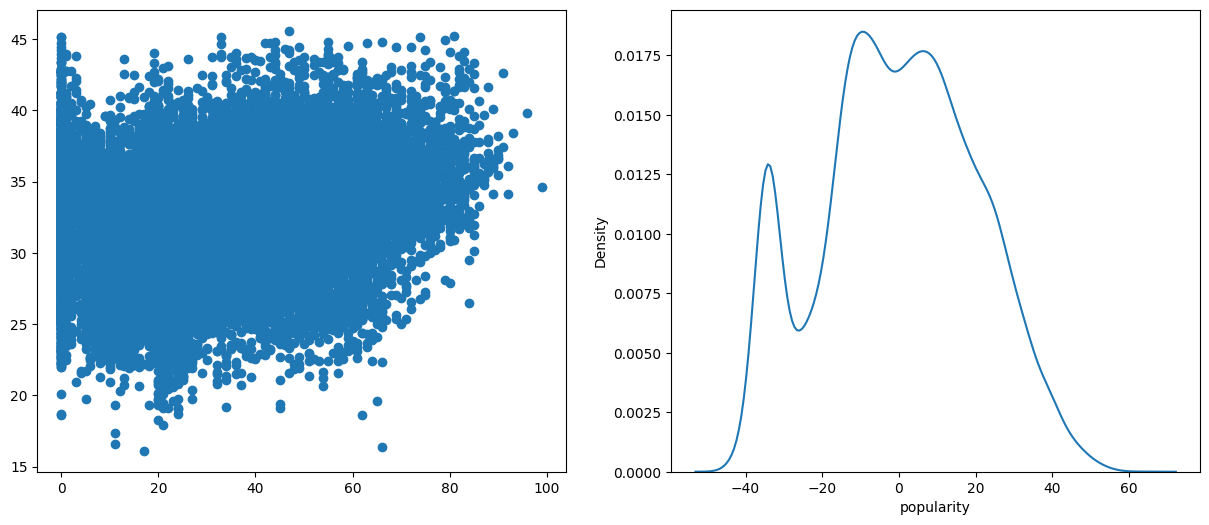

In [62]:
model(lr)

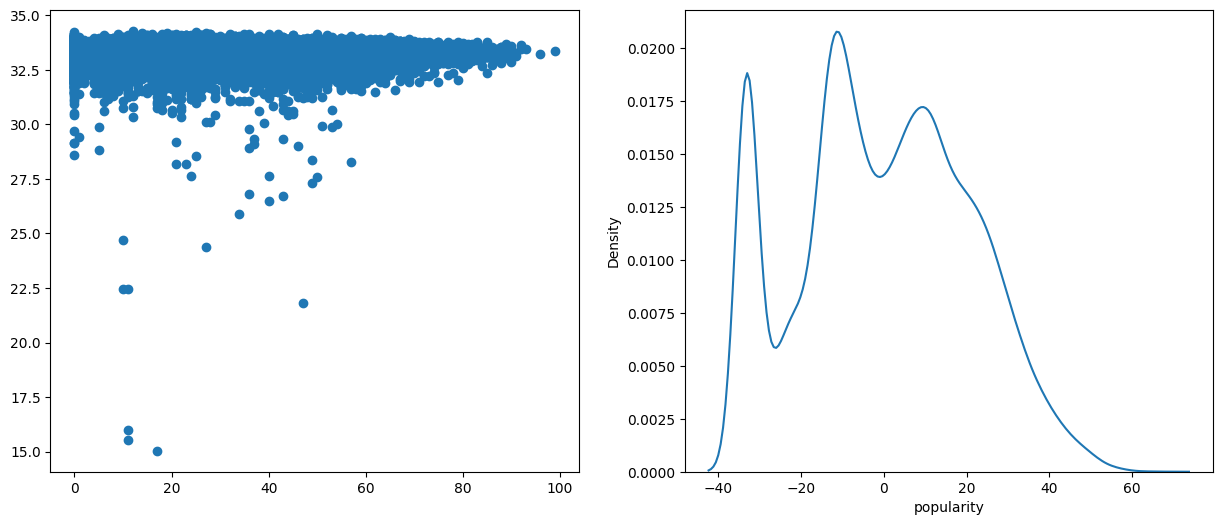

In [63]:
model(lasso)

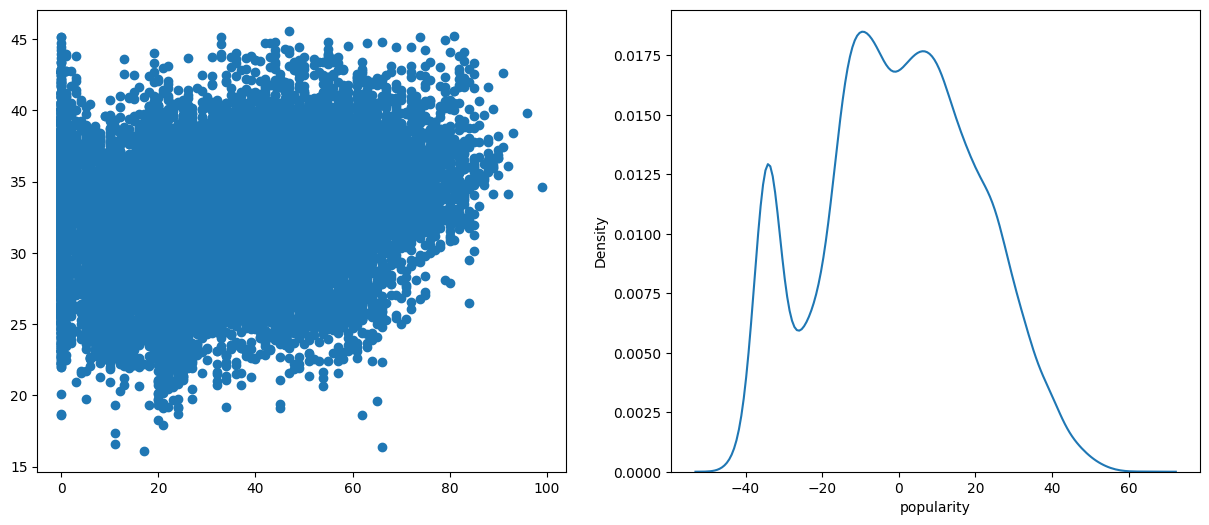

In [64]:
model(ridge)

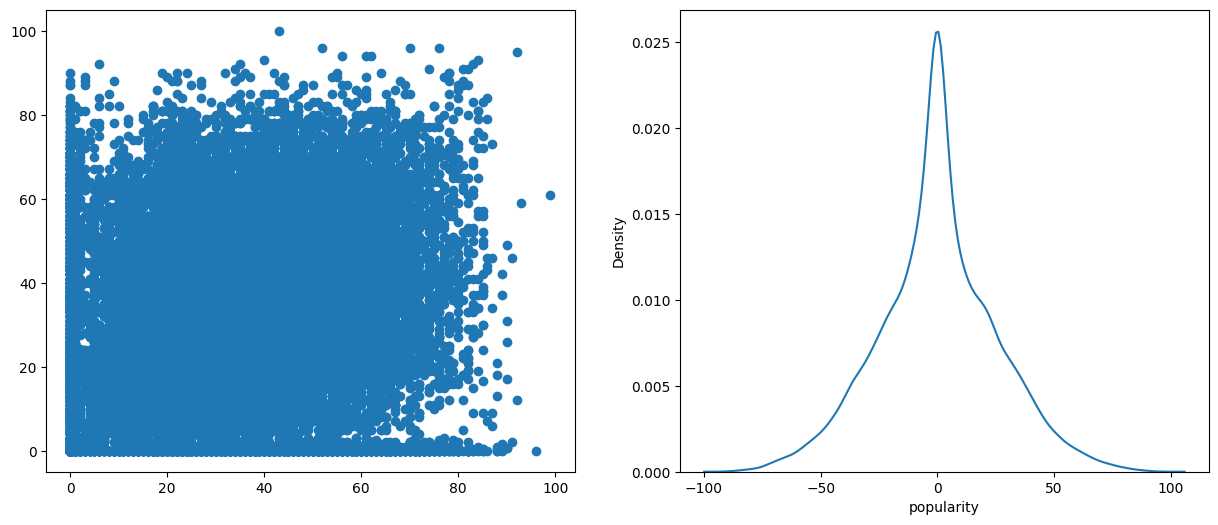

In [65]:
model(dtree)

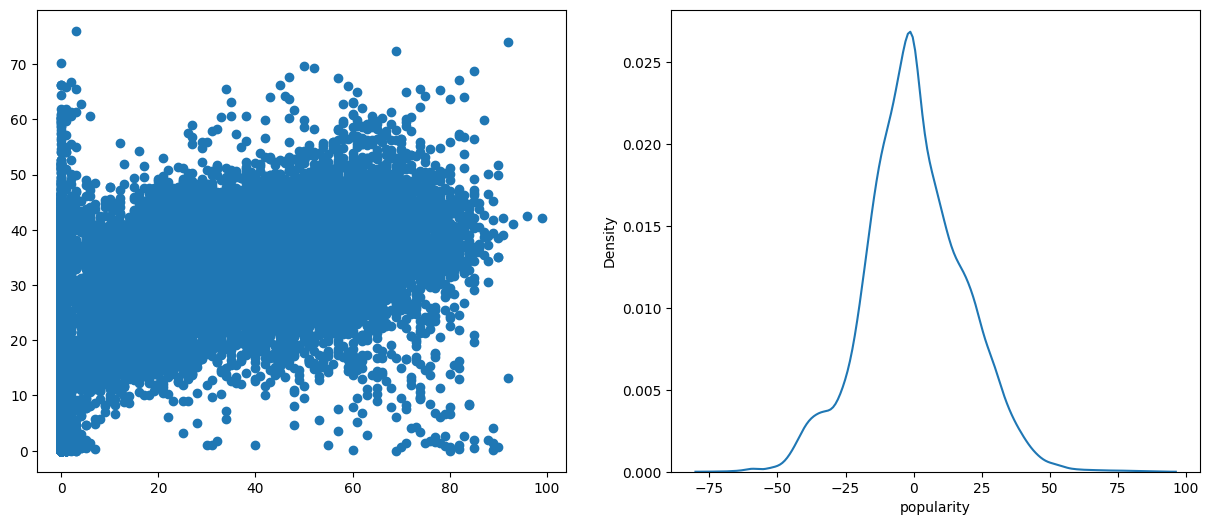

In [66]:
model(rforest)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [68]:
algos=[lr, lasso, ridge, dtree, rforest]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)

In [69]:
algosname=['Linear Regression', 'Lasso', 'Ridge', 'DecisionTree','RandomForest']
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])

In [70]:
metrics

,Model,MSE,ABMSE,R2_score
0,Linear Regression,413.114510,16.728895,0.031314
1,Lasso,426.200023,17.283823,0.000630
2,Ridge,413.114870,16.729153,0.031313
3,DecisionTree,646.384972,19.029158,-0.515668
4,RandomForest,330.874624,14.050351,0.224153


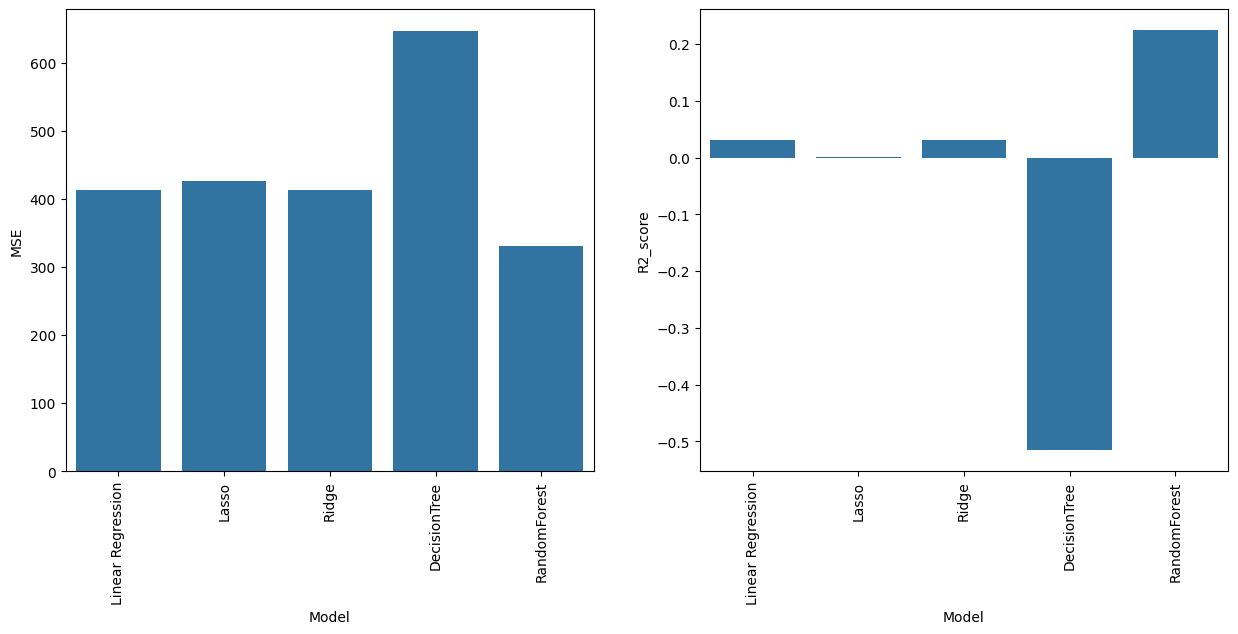

In [72]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()